# Laboratory 1
    Rob's Notebook

# Imports

#### Python libraries

In [1]:
import sys
import pandas as pd
import numpy as np
import re
import unicodedata
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

#### Acillary modules

In [2]:
%load_ext autoreload
%autoreload 2

sys.path.append("../utils/")
from lab1_funcs import *

# Loading data

Data downloaded from -> https://datos.cdmx.gob.mx/explore/dataset/consumo-agua/export/

In [4]:
df = pd.read_csv("../data/consumo-agua.csv")

In [5]:
df

Geo Point  \
0      19.4552601937,-99.1126617526   
1      19.4552601937,-99.1126617526   
2      19.4557195871,-99.1135822797   
3      19.4596467168,-99.1044693641   
4      19.4741606185,-99.1467497317   
...                             ...   
71097  19.4485642979,-99.1399395353   
71098  19.4493393649,-99.1457191092   
71099  19.4483923147,-99.1459300721   
71100  19.4475868325,-99.1425094385   
71101  19.4474017534,-99.1397251034   

                                               Geo Shape  consumo_total_mixto  \
0      {"type": "MultiPolygon", "coordinates": [[[[-9...               159.72   
1      {"type": "MultiPolygon", "coordinates": [[[[-9...                 0.00   
2      {"type": "MultiPolygon", "coordinates": [[[[-9...                 0.00   
3      {"type": "MultiPolygon", "coordinates": [[[[-9...                 0.00   
4      {"type": "MultiPolygon", "coordinates": [[[[-9...                56.72   
...                                                  ...                  ...   
71097  {"type": "MultiPolygon", "coordinates": [[[[-9...                  NaN   
71098  {"type": "MultiPolygon", "coordinates": [[[[-9...                71.30   
71099  {"type": "MultiPolygon", "coordinates": [[[[-9...               759.16   
71100  {"type": "MultiPolygon", "coordinates": [[[[-9...               402.65   
71101  {"type": "MultiPolygon", "coordinates": [[[[-9...                41.20   

       anio             nomgeo  consumo_prom_dom  consumo_total_dom  \
0      2019  Gustavo A. Madero         42.566364             468.23   
1      2019  Gustavo A. Madero         35.936667             107.81   
2      2019  Gustavo A. Madero         24.586000             122.93   
3      2019  Gustavo A. Madero          0.000000               0.00   
4      2019       Azcapotzalco         67.436250             539.49   
...     ...                ...               ...                ...   
71097  2019         Cuauhtémoc         20.053112            3930.41   
71098  2019         Cuauhtémoc         21.126615            9549.24   
71099  2019         Cuauhtémoc         27.527778            4707.25   
71100  2019         Cuauhtémoc         30.605000             550.89   
71101  2019         Cuauhtémoc         22.507710            8552.94   

                alcaldia             colonia  consumo_prom_mixto  \
0      GUSTAVO A. MADERO      7 DE NOVIEMBRE           53.240000   
1      GUSTAVO A. MADERO      7 DE NOVIEMBRE            0.000000   
2      GUSTAVO A. MADERO      7 DE NOVIEMBRE            0.000000   
3      GUSTAVO A. MADERO  NUEVA TENOCHTITLAN            0.000000   
4           AZCAPOTZALCO            PROHOGAR           56.720000   
...                  ...                 ...                 ...   
71097         CUAUHTEMOC            GUERRERO                 NaN   
71098         CUAUHTEMOC            GUERRERO           35.650001   
71099         CUAUHTEMOC            GUERRERO           94.894999   
71100         CUAUHTEMOC            GUERRERO          100.662498   
71101         CUAUHTEMOC            GUERRERO           13.733333   

       consumo_total  consumo_prom  consumo_prom_no_dom  bimestre  \
0             631.00     42.066667             3.050000         3   
1             115.13     28.782500             7.320000         3   
2             197.96     32.993333            75.030000         3   
3             253.53     84.510000            84.510000         3   
4             839.35     76.304545           121.570000         3   
...              ...           ...                  ...       ...   
71097        4286.28     19.307568            13.687308         1   
71098        9796.12     20.976702            13.506923         1   
71099        5692.81     29.344381            15.093334         1   
71100         963.15     41.876087             9.610000         1   
71101        9000.07     21.951366            15.034444         1   

       consumo_total_no_dom    gid indice_des  
0                      3.05  57250   

# Data profiling

## ¿Cuántas variables tenemos?

In [ ]:
count_vars(df)

## ¿Cuántas observaciones tenemos?

In [ ]:
count_obs(df)

## ¿Cuántas observaciones únicas tenemos por variable?

In [ ]:
count_unique_obs(df)

## ¿Cuántas variables numéricas tenemos?

Tenemos 8 variables numéricas

In [ ]:
vars_num = [
    "consumo_total_mixto",
    "consumo_prom_dom",
    "consumo_total_dom",
    "consumo_prom_mixto",
    "consumo_total",
    "consumo_prom",
    "consumo_prom_no_dom",
    "consumo_total_no_dom"
]

In [ ]:
count_type_vars(vars_num, "numerica")

## ¿Cuántas variables de fecha tenemos?
- Para efectos de este ejercicio, no hay ninguna variable de tipo fecha, o que consideremos de fecha.

## ¿Cuántas variables categóricas tenemos?

In [ ]:
cat_vars = [
    "anio",
    "nomgeo",
    "alcaldia",
    "colonia",
    "bimestre",
    "indice_des",
]

In [ ]:
count_type_vars(cat_vars, "categórica")

## ¿Cuántas variables de texto tenemos?
- Para efectos de este ejercicio, no hay ninguna variable de tipo texto, o que consideremos de texto. Se podría considerar a la variable `gid` como un identificador de texto.

In [ ]:
vars_text = ["gid"]

In [ ]:
count_type_vars(vars_text, "texto")

## Generea el profiling de cada variable

### Numeric data profiling

- [x] Tipo de dato: float, integer
- [x] Número de observaciones
- [x] Mean
- [x] Desviación estándar
- [x] Cuartiles: 25%, 50%, 75%
- [x] Valor máximo
- [x] Valor mínimo
- [x] Número de observaciones únicos
- [x] Top 5 observaciones repetidas
- [x] Número de observaciones con valores faltantes
- [x] ¿Hay redondeos? -> Se observa que los datos de los totales en el consumo (dom, mixto, no_dom) están a dos decimales desde la fuente. Los datos de los promedios del consumo (dom, mixto, no_dom) tienen seis decimales desde la fuente.  No podemos asegurar que los datos, tanto de los totales, como de los promedios,  están redondeados.

#### Función para perfil de datos numérico

In [ ]:
## Data profiling compacted in function
data_profiling_numeric(df, vars_num)

### Categoric data profiling

**Profiling: Variables categóricas**

- [x] Número de categorías
- [x] Valor de las categorías
- [x] Moda
- [x] Valores faltantes
- [x] Número de observaciones con valores faltantes
- [x] Proporción de observaciones por categoría
- [x] Top 1, top 2, top 3 (moda 1, moda 2, moda 3)
- [x] Faltas de ortografía ?

In [ ]:
#data profiling function
data_profiling_categ(df,cat_vars)

### Additional data profiling

- En este ejercicio particular no se contó con variables del siguiente tipo para hacer el profiling:
    - Imágen
    - Audio

## ¿Qué conocemos ahora de este set de datos por variable?

1. ¿Cuántas alcadías tienes?
    - Hay un total de 16 alcaldías

2. ¿Cuántos `nomgeo` tienes?
    - Hay un total de 17 nomgeo

3. ¿Identificas algún error?
    - Hay una categoría con un error ortográfico: Existen 2140 observaciones en la columna **nomgeo** que dice: Talpan y 1064 observaciones que dicen: Tlalpan

## Transformar el nombre de las columnas a formato estándar: minúsculas, sin espacios en blanco -cambiar por guiónes bajos-, sin signos de puntuación

In [6]:
df_cleancols = clean_col_names(df)

In [7]:
df_cleancols

geo_point  \
0      19.4552601937,-99.1126617526   
1      19.4552601937,-99.1126617526   
2      19.4557195871,-99.1135822797   
3      19.4596467168,-99.1044693641   
4      19.4741606185,-99.1467497317   
...                             ...   
71097  19.4485642979,-99.1399395353   
71098  19.4493393649,-99.1457191092   
71099  19.4483923147,-99.1459300721   
71100  19.4475868325,-99.1425094385   
71101  19.4474017534,-99.1397251034   

                                               geo_shape  consumo_total_mixto  \
0      {"type": "MultiPolygon", "coordinates": [[[[-9...               159.72   
1      {"type": "MultiPolygon", "coordinates": [[[[-9...                 0.00   
2      {"type": "MultiPolygon", "coordinates": [[[[-9...                 0.00   
3      {"type": "MultiPolygon", "coordinates": [[[[-9...                 0.00   
4      {"type": "MultiPolygon", "coordinates": [[[[-9...                56.72   
...                                                  ...                  ...   
71097  {"type": "MultiPolygon", "coordinates": [[[[-9...                  NaN   
71098  {"type": "MultiPolygon", "coordinates": [[[[-9...                71.30   
71099  {"type": "MultiPolygon", "coordinates": [[[[-9...               759.16   
71100  {"type": "MultiPolygon", "coordinates": [[[[-9...               402.65   
71101  {"type": "MultiPolygon", "coordinates": [[[[-9...                41.20   

       anio             nomgeo  consumo_prom_dom  consumo_total_dom  \
0      2019  Gustavo A. Madero         42.566364             468.23   
1      2019  Gustavo A. Madero         35.936667             107.81   
2      2019  Gustavo A. Madero         24.586000             122.93   
3      2019  Gustavo A. Madero          0.000000               0.00   
4      2019       Azcapotzalco         67.436250             539.49   
...     ...                ...               ...                ...   
71097  2019         Cuauhtémoc         20.053112            3930.41   
71098  2019         Cuauhtémoc         21.126615            9549.24   
71099  2019         Cuauhtémoc         27.527778            4707.25   
71100  2019         Cuauhtémoc         30.605000             550.89   
71101  2019         Cuauhtémoc         22.507710            8552.94   

                alcaldia             colonia  consumo_prom_mixto  \
0      GUSTAVO A. MADERO      7 DE NOVIEMBRE           53.240000   
1      GUSTAVO A. MADERO      7 DE NOVIEMBRE            0.000000   
2      GUSTAVO A. MADERO      7 DE NOVIEMBRE            0.000000   
3      GUSTAVO A. MADERO  NUEVA TENOCHTITLAN            0.000000   
4           AZCAPOTZALCO            PROHOGAR           56.720000   
...                  ...                 ...                 ...   
71097         CUAUHTEMOC            GUERRERO                 NaN   
71098         CUAUHTEMOC            GUERRERO           35.650001   
71099         CUAUHTEMOC            GUERRERO           94.894999   
71100         CUAUHTEMOC            GUERRERO          100.662498   
71101         CUAUHTEMOC            GUERRERO           13.733333   

       consumo_total  consumo_prom  consumo_prom_no_dom  bimestre  \
0             631.00     42.066667             3.050000         3   
1             115.13     28.782500             7.320000         3   
2             197.96     32.993333            75.030000         3   
3             253.53     84.510000            84.510000         3   
4             839.35     76.304545           121.570000         3   
...              ...           ...                  ...       ...   
71097        4286.28     19.307568            13.687308         1   
71098        9796.12     20.976702            13.506923         1   
71099        5692.81     29.344381            15.093334         1   
71100         963.15     41.876087             9.610000         1   
71101        9000.07     21.951366            15.034444         1   

       consumo_total_no_dom    gid indice_des  
0                      3.05  57250   

## Transformación de variables geoespaciales
- Agregar la variable `latitud` y `longitud` generadas a partir de la column `geo_point`.
- Pasar la variable `latitud` y `longitud` a numérica -si no la tomó como numérica-.
- Eliminar la columna `geo_point` -una vez que creaste la variable `latitud` y `longitud`.
- Eliminar la columna `geo_shape`.
- Cambiar a minúsculas las columnas `alcaldía`, `colonia` e `indice_des`.

In [8]:
df_geotransform = geo_transformation(df_cleancols, "geo_point", "geo_shape")
df_geotransform

consumo_total_mixto  anio             nomgeo  consumo_prom_dom  \
0                   159.72  2019  Gustavo A. Madero         42.566364   
1                     0.00  2019  Gustavo A. Madero         35.936667   
2                     0.00  2019  Gustavo A. Madero         24.586000   
3                     0.00  2019  Gustavo A. Madero          0.000000   
4                    56.72  2019       Azcapotzalco         67.436250   
...                    ...   ...                ...               ...   
71097                  NaN  2019         Cuauhtémoc         20.053112   
71098                71.30  2019         Cuauhtémoc         21.126615   
71099               759.16  2019         Cuauhtémoc         27.527778   
71100               402.65  2019         Cuauhtémoc         30.605000   
71101                41.20  2019         Cuauhtémoc         22.507710   

       consumo_total_dom           alcaldia             colonia  \
0                 468.23  GUSTAVO A. MADERO      7 DE NOVIEMBRE   
1                 107.81  GUSTAVO A. MADERO      7 DE NOVIEMBRE   
2                 122.93  GUSTAVO A. MADERO      7 DE NOVIEMBRE   
3                   0.00  GUSTAVO A. MADERO  NUEVA TENOCHTITLAN   
4                 539.49       AZCAPOTZALCO            PROHOGAR   
...                  ...                ...                 ...   
71097            3930.41         CUAUHTEMOC            GUERRERO   
71098            9549.24         CUAUHTEMOC            GUERRERO   
71099            4707.25         CUAUHTEMOC            GUERRERO   
71100             550.89         CUAUHTEMOC            GUERRERO   
71101            8552.94         CUAUHTEMOC            GUERRERO   

       consumo_prom_mixto  consumo_total  consumo_prom  consumo_prom_no_dom  \
0               53.240000         631.00     42.066667             3.050000   
1                0.000000         115.13     28.782500             7.320000   
2                0.000000         197.96     32.993333            75.030000   
3                0.000000         253.53     84.510000            84.510000   
4               56.720000         839.35     76.304545           121.570000   
...                   ...            ...           ...                  ...   
71097                 NaN        4286.28     19.307568            13.687308   
71098           35.650001        9796.12     20.976702            13.506923   
71099           94.894999        5692.81     29.344381            15.093334   
71100          100.662498         963.15     41.876087             9.610000   
71101           13.733333        9000.07     21.951366            15.034444   

       bimestre  consumo_total_no_dom    gid indice_des    latitud   longitud  
0             3                  3.05  57250       ALTO  19.455260 -99.112662  
1             3                  7.32  57253      MEDIO  19.455260 -99.112662  
2             3                 75.03  57255    POPULAR  19.455720 -99.113582  
3             3                253.53  57267       BAJO  19.459647 -99.104469  
4             3                243.14  57330       BAJO  19.474161 -99.146750  
...         ...                   ...    ...        ...        ...        ...  
71097         1                355.87    233       BAJO  19.448564 -99.139940  
71098         1                175.59    238    POPULAR  19.449339 -99.145719  
71099         1                226.40    239       BAJO  19.448392 -99.145930  
71100         1                  9.61    244       BAJO  19.447587 -99.142509  
71101         1                405.93    247       BAJO  19.447402 -99.139725  

[71102 rows x 17 columns]

## Geospatial data profiling

In [9]:
geo_vars = ["latitud", "longitud"]

geo_vars_precision(df_geotransform, geo_vars)

No. of entries - latitud  No. of entries - longitud
No. of decimals                                                     
10                                  64044                      64152
9                                    6274                       6316
8                                     712                        580
7                                      69                         39
6                                       3                         12

None


- Cambiar a minúsculas las columnas `alcaldía`, `colonia` e `indice_des`.

---
---

In [10]:
vars_lower=["indice_des", "alcaldia", "colonia","nomgeo"]

df_lower_values = convert_lower(df_geotransform, vars_lower)

## Corrección de observaciones seleccionadas

- Nótese que hay una entrada llamada "talpan" que debería ser "tlalpan"

In [12]:
dicc_cor = {
    "nomgeo": {
        "talpan": "tlalpan"
    }
}

In [13]:
df_correct = correct_selected_entries(df_lower_values, dicc_cor)

# Review Changes

## ¿Cuántas variables tenemos?

In [20]:
count_vars(df_correct)

Número de variables en los datos --> 17


## ¿Cuántas observaciones tenemos?

In [ ]:
count_obs(df_correct)

## ¿Cuántas observaciones únicas tenemos por variable?

In [21]:
count_unique_obs(df_correct)

consumo_total_mixto     24339
anio                        1
nomgeo                     16
consumo_prom_dom        52060
consumo_total_dom       47051
alcaldia                   16
colonia                  1340
consumo_prom_mixto      31911
consumo_total           56015
consumo_prom            62214
consumo_prom_no_dom     37440
bimestre                    3
consumo_total_no_dom    27336
gid                     71102
indice_des                  4
latitud                 22930
longitud                22930
dtype: int64

## ¿Cuántas variables numéricas tenemos?

In [ ]:
vars_num = [
    "consumo_total_mixto",
    "consumo_prom_dom",
    "consumo_total_dom",
    "consumo_prom_mixto",
    "consumo_total",
    "consumo_prom",
    "consumo_prom_no_dom",
    "consumo_total_no_dom",
    "latitud",
    "longitud"
]

In [ ]:
count_type_vars(vars_num, "numerica")

## ¿Cuántas variables de fecha tenemos?
- Para efectos de este ejercicio, no hay ninguna variable de tipo fecha, o que consideremos de fecha.

## ¿Cuántas variables categóricas tenemos?

In [ ]:
cat_vars = [
    "anio",
    "nomgeo",
    "alcaldia",
    "colonia",
    "bimestre",
    "indice_des",
]

In [ ]:
count_type_vars(cat_vars, "categórica")

## ¿Cuántas variables de texto tenemos?
- Para efectos de este ejercicio, no hay ninguna variable de tipo texto, o que consideremos de texto. Se podría considerar a la variable `gid` como un identificador de texto.

In [ ]:
vars_text = ["gid"]

In [ ]:
count_type_vars(vars_text, "texto")

## Genera el profiling de cada variable

In [ ]:
## Data profiling compacted in function
data_profiling_numeric(df_correct, vars_num)

In [ ]:
df_correct["nomgeo"].value_counts() 

In [ ]:
#data profiling function
data_profiling_categ(df_correct,cat_vars)

## Data profiling

In [ ]:
profile = ProfileReport(df_correct, title="Pandas Profiling Report", explorative = True)

In [ ]:
profile

In [ ]:
profile.to_file("Profile_variables.html")

# GEDA

## Barplots

In [158]:
cat_vars = [
    "anio",
    "nomgeo",
    "alcaldia",
    "colonia",
    "bimestre",
    "indice_des",
]

In [159]:
count_type_vars(cat_vars, "categórica")

Número de variables de tipo categórica --> 6


Variable(s)
1        anio
2      nomgeo
3    alcaldia
4     colonia
5    bimestre
6  indice_des

None


In [160]:
df_test = df_correct.copy()

In [161]:
barplot_cat(df_test, "alcaldia", tops=10)

Otras_categs contiene la siguiente información: 
    -> 6 categorías (37.50%)
    -> su conteo de valores representa el (14.21%) del conteo total


## Rugplot

In [162]:
vars_num = [
    "consumo_total_mixto",
    "consumo_prom_dom",
    "consumo_total_dom",
    "consumo_prom_mixto",
    "consumo_total",
    "consumo_prom",
    "consumo_prom_no_dom",
    "consumo_total_no_dom"
]

In [163]:
count_type_vars(vars_num, "numerica")

Número de variables de tipo numerica --> 8


Variable(s)
1   consumo_total_mixto
2      consumo_prom_dom
3     consumo_total_dom
4    consumo_prom_mixto
5         consumo_total
6          consumo_prom
7   consumo_prom_no_dom
8  consumo_total_no_dom

None


In [164]:
df_test = df_correct.copy()

In [165]:
df_test

consumo_total_mixto  anio             nomgeo  consumo_prom_dom  \
0                   159.72  2019  gustavo a. madero         42.566364   
1                     0.00  2019  gustavo a. madero         35.936667   
2                     0.00  2019  gustavo a. madero         24.586000   
3                     0.00  2019  gustavo a. madero          0.000000   
4                    56.72  2019       azcapotzalco         67.436250   
...                    ...   ...                ...               ...   
71097                  NaN  2019         cuauhtémoc         20.053112   
71098                71.30  2019         cuauhtémoc         21.126615   
71099               759.16  2019         cuauhtémoc         27.527778   
71100               402.65  2019         cuauhtémoc         30.605000   
71101                41.20  2019         cuauhtémoc         22.507710   

       consumo_total_dom           alcaldia             colonia  \
0                 468.23  gustavo a. madero      7 de noviembre   
1                 107.81  gustavo a. madero      7 de noviembre   
2                 122.93  gustavo a. madero      7 de noviembre   
3                   0.00  gustavo a. madero  nueva tenochtitlan   
4                 539.49       azcapotzalco            prohogar   
...                  ...                ...                 ...   
71097            3930.41         cuauhtemoc            guerrero   
71098            9549.24         cuauhtemoc            guerrero   
71099            4707.25         cuauhtemoc            guerrero   
71100             550.89         cuauhtemoc            guerrero   
71101            8552.94         cuauhtemoc            guerrero   

       consumo_prom_mixto  consumo_total  consumo_prom  consumo_prom_no_dom  \
0               53.240000         631.00     42.066667             3.050000   
1                0.000000         115.13     28.782500             7.320000   
2                0.000000         197.96     32.993333            75.030000   
3                0.000000         253.53     84.510000            84.510000   
4               56.720000         839.35     76.304545           121.570000   
...                   ...            ...           ...                  ...   
71097                 NaN        4286.28     19.307568            13.687308   
71098           35.650001        9796.12     20.976702            13.506923   
71099           94.894999        5692.81     29.344381            15.093334   
71100          100.662498         963.15     41.876087             9.610000   
71101           13.733333        9000.07     21.951366            15.034444   

       bimestre  consumo_total_no_dom    gid indice_des    latitud   longitud  
0             3                  3.05  57250       alto  19.455260 -99.112662  
1             3                  7.32  57253      medio  19.455260 -99.112662  
2             3                 75.03  57255    popular  19.455720 -99.113582  
3             3                253.53  57267       bajo  19.459647 -99.104469  
4             3                243.14  57330       bajo  19.474161 -99.146750  
...         ...                   ...    ...        ...        ...        ...  
71097         1                355.87    233       bajo  19.448564 -99.139940  
71098         1                175.59    238    popular  19.449339 -99.145719  
71099         1                226.40    239       bajo  19.448392 -99.145930  
71100         1                  9.61    244       bajo  19.447587 -99.142509  
71101         1                405.93    247       bajo  19.447402 -99.139725  

[71102 rows x 17 columns]

In [166]:
rugplot_num(df_test, "consumo_prom_no_dom")

## Density estimate

In [167]:
vars_num = [
    "consumo_total_mixto",
    "consumo_prom_dom",
    "consumo_total_dom",
    "consumo_prom_mixto",
    "consumo_total",
    "consumo_prom",
    "consumo_prom_no_dom",
    "consumo_total_no_dom"
]

In [168]:
count_type_vars(vars_num, "numerica")

Número de variables de tipo numerica --> 8


Variable(s)
1   consumo_total_mixto
2      consumo_prom_dom
3     consumo_total_dom
4    consumo_prom_mixto
5         consumo_total
6          consumo_prom
7   consumo_prom_no_dom
8  consumo_total_no_dom

None


In [169]:
df_test = df_correct.copy()

In [170]:
df_test

consumo_total_mixto  anio             nomgeo  consumo_prom_dom  \
0                   159.72  2019  gustavo a. madero         42.566364   
1                     0.00  2019  gustavo a. madero         35.936667   
2                     0.00  2019  gustavo a. madero         24.586000   
3                     0.00  2019  gustavo a. madero          0.000000   
4                    56.72  2019       azcapotzalco         67.436250   
...                    ...   ...                ...               ...   
71097                  NaN  2019         cuauhtémoc         20.053112   
71098                71.30  2019         cuauhtémoc         21.126615   
71099               759.16  2019         cuauhtémoc         27.527778   
71100               402.65  2019         cuauhtémoc         30.605000   
71101                41.20  2019         cuauhtémoc         22.507710   

       consumo_total_dom           alcaldia             colonia  \
0                 468.23  gustavo a. madero      7 de noviembre   
1                 107.81  gustavo a. madero      7 de noviembre   
2                 122.93  gustavo a. madero      7 de noviembre   
3                   0.00  gustavo a. madero  nueva tenochtitlan   
4                 539.49       azcapotzalco            prohogar   
...                  ...                ...                 ...   
71097            3930.41         cuauhtemoc            guerrero   
71098            9549.24         cuauhtemoc            guerrero   
71099            4707.25         cuauhtemoc            guerrero   
71100             550.89         cuauhtemoc            guerrero   
71101            8552.94         cuauhtemoc            guerrero   

       consumo_prom_mixto  consumo_total  consumo_prom  consumo_prom_no_dom  \
0               53.240000         631.00     42.066667             3.050000   
1                0.000000         115.13     28.782500             7.320000   
2                0.000000         197.96     32.993333            75.030000   
3                0.000000         253.53     84.510000            84.510000   
4               56.720000         839.35     76.304545           121.570000   
...                   ...            ...           ...                  ...   
71097                 NaN        4286.28     19.307568            13.687308   
71098           35.650001        9796.12     20.976702            13.506923   
71099           94.894999        5692.81     29.344381            15.093334   
71100          100.662498         963.15     41.876087             9.610000   
71101           13.733333        9000.07     21.951366            15.034444   

       bimestre  consumo_total_no_dom    gid indice_des    latitud   longitud  
0             3                  3.05  57250       alto  19.455260 -99.112662  
1             3                  7.32  57253      medio  19.455260 -99.112662  
2             3                 75.03  57255    popular  19.455720 -99.113582  
3             3                253.53  57267       bajo  19.459647 -99.104469  
4             3                243.14  57330       bajo  19.474161 -99.146750  
...         ...                   ...    ...        ...        ...        ...  
71097         1                355.87    233       bajo  19.448564 -99.139940  
71098         1                175.59    238    popular  19.449339 -99.145719  
71099         1                226.40    239       bajo  19.448392 -99.145930  
71100         1                  9.61    244       bajo  19.447587 -99.142509  
71101         1                405.93    247       bajo  19.447402 -99.139725  

[71102 rows x 17 columns]

/Users/rp_mbp/.pyenv/versions/3.7.4/envs/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



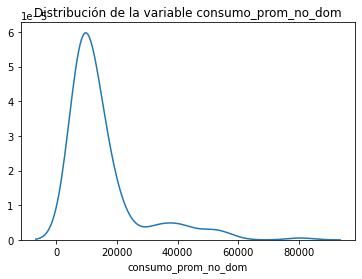

In [171]:
distplot_num(df_test, "consumo_prom_no_dom", 85)

# Data analysis

## ¿Cómo se distribuye geoespacialmente la variable respuesta indice_des?

### ¿Qué estoy buscando?
1. **¿Hay alguna correlación entre la ubicación de los puntos y su clasificación?**

2. **¿Cuál es el índice de consumo `indice_des` por `alcaldía` (correlación entre variables categóricas)?**

3. **¿Qué tan consistente se clasifica la variable `colonia` con el `indice_des`?**

4. **¿La columna `nomgeo` y `alcaldía` son iguales?**
    - Después de una breve exploración me di cuenta de que sí son iguales, solamente difieren por algunos acentos. Por esta razón decidí trabajar con la columna `alcaldia`. 
    - Ya confirmé que sí son iguales

In [69]:
dfx = df_correct.copy()

In [70]:
dfx

consumo_total_mixto  anio             nomgeo  consumo_prom_dom  \
0                   159.72  2019  gustavo a. madero         42.566364   
1                     0.00  2019  gustavo a. madero         35.936667   
2                     0.00  2019  gustavo a. madero         24.586000   
3                     0.00  2019  gustavo a. madero          0.000000   
4                    56.72  2019       azcapotzalco         67.436250   
...                    ...   ...                ...               ...   
71097                  NaN  2019         cuauhtémoc         20.053112   
71098                71.30  2019         cuauhtémoc         21.126615   
71099               759.16  2019         cuauhtémoc         27.527778   
71100               402.65  2019         cuauhtémoc         30.605000   
71101                41.20  2019         cuauhtémoc         22.507710   

       consumo_total_dom           alcaldia             colonia  \
0                 468.23  gustavo a. madero      7 de noviembre   
1                 107.81  gustavo a. madero      7 de noviembre   
2                 122.93  gustavo a. madero      7 de noviembre   
3                   0.00  gustavo a. madero  nueva tenochtitlan   
4                 539.49       azcapotzalco            prohogar   
...                  ...                ...                 ...   
71097            3930.41         cuauhtemoc            guerrero   
71098            9549.24         cuauhtemoc            guerrero   
71099            4707.25         cuauhtemoc            guerrero   
71100             550.89         cuauhtemoc            guerrero   
71101            8552.94         cuauhtemoc            guerrero   

       consumo_prom_mixto  consumo_total  consumo_prom  consumo_prom_no_dom  \
0               53.240000         631.00     42.066667             3.050000   
1                0.000000         115.13     28.782500             7.320000   
2                0.000000         197.96     32.993333            75.030000   
3                0.000000         253.53     84.510000            84.510000   
4               56.720000         839.35     76.304545           121.570000   
...                   ...            ...           ...                  ...   
71097                 NaN        4286.28     19.307568            13.687308   
71098           35.650001        9796.12     20.976702            13.506923   
71099           94.894999        5692.81     29.344381            15.093334   
71100          100.662498         963.15     41.876087             9.610000   
71101           13.733333        9000.07     21.951366            15.034444   

       bimestre  consumo_total_no_dom    gid indice_des    latitud   longitud  
0             3                  3.05  57250       alto  19.455260 -99.112662  
1             3                  7.32  57253      medio  19.455260 -99.112662  
2             3                 75.03  57255    popular  19.455720 -99.113582  
3             3                253.53  57267       bajo  19.459647 -99.104469  
4             3                243.14  57330       bajo  19.474161 -99.146750  
...         ...                   ...    ...        ...        ...        ...  
71097         1                355.87    233       bajo  19.448564 -99.139940  
71098         1                175.59    238    popular  19.449339 -99.145719  
71099         1                226.40    239       bajo  19.448392 -99.145930  
71100         1                  9.61    244       bajo  19.447587 -99.142509  
71101         1                405.93    247       bajo  19.447402 -99.139725  

[71102 rows x 17 columns]

#### 2. ¿Cuál es el índice de consumo indice_des por alcaldía (correlación entre variables categóricas)?
    - Sí vemos que claramente hay algunas alcaldías (e.g. iztapalapa) que tienen una tendencia hacia una categoría en especial.
    - Tal vez se podría crear un índice que sintetize todas las colonias en un solo valor.
    - Consideramos que la variable tiempo no es muy relevante aquí porque solo tenemos datos de 1 año y es difícil que la calificación nivel de desarrollo varíe mucho por alcaldía.
    - Con el mapa de calor por alcaldía podemos ver que sí hay ubicaciones específicas con una tendencia clara a ser clasificadas con un `indice_des` particular.

In [96]:
## Conteo de registros por colonia por indice_des

dfx2 = dfx.groupby(["alcaldia", "indice_des"])["gid"].count().unstack().fillna(0)
dfx2

indice_des             alto    bajo   medio  popular
alcaldia                                            
alvaro obregon       1117.0  1409.0   442.0   1172.0
azcapotzalco           55.0  2996.0   340.0    825.0
benito juarez        3421.0  2028.0   192.0    408.0
coyoacan             1944.0  1346.0   385.0   1272.0
cuajimalpa            347.0    87.0   157.0    301.0
cuauhtemoc           1988.0  2368.0  1401.0   1556.0
gustavo a. madero    1356.0  4306.0  2290.0   2106.0
iztacalco             309.0  2028.0   365.0    767.0
iztapalapa             32.0  6621.0     3.0   3859.0
magdalena contreras   330.0   370.0    87.0    168.0
miguel hidalgo       2607.0   703.0  1091.0    709.0
milpa alta              0.0   201.0   201.0    248.0
tlahuac               195.0   521.0   729.0    510.0
tlalpan               954.0   646.0   764.0    840.0
venustiano carranza   446.0  3008.0   734.0    991.0
xochimilco            415.0   610.0   618.0    807.0

In [97]:
## Convertir de valores absoultos a proporcionales

dfx2["total"] = dfx2.sum(axis=1)
for col in [x for x in dfx2.columns if x != "total"]:
    dfx2[col + "_part"] = dfx2[col]/dfx2["total"]*100
    dfx2.drop(col, axis=1, inplace=True)
dfx2.drop(["total"], axis=1, inplace=True)

dfx2

indice_des           alto_part  bajo_part  medio_part  popular_part
alcaldia                                                           
alvaro obregon       26.980676  34.033816   10.676329     28.309179
azcapotzalco          1.304554  71.062619    8.064516     19.568311
benito juarez        56.554802  33.526203    3.174078      6.744917
coyoacan             39.296543  27.208409    7.782494     25.712553
cuajimalpa           38.901345   9.753363   17.600897     33.744395
cuauhtemoc           27.184466  32.380692   19.157664     21.277178
gustavo a. madero    13.481806  42.811692   22.767946     20.938556
iztacalco             8.907466  58.460651   10.521764     22.110118
iztapalapa            0.304327  62.967190    0.028531     36.699952
magdalena contreras  34.554974  38.743455    9.109948     17.591623
miguel hidalgo       51.017613  13.757339   21.350294     13.874755
milpa alta            0.000000  30.923077   30.923077     38.153846
tlahuac               9.974425  26.649616   37.289003     26.086957
tlalpan              29.775281  20.162297   23.845194     26.217228
venustiano carranza   8.611701  58.080711   14.172620     19.134968
xochimilco           16.938776  24.897959   25.224490     32.938776

In [109]:
## Heatmap con los resultados

fig = px.imshow(dfx2)

fig.update_layout(
    autosize=False,
    width=500,
    height=1000
)

sfig.show()

#### 3. ¿Qué tan consistente se clasifica la variable `colonia` con el `indice_des`?
    - No hay mucha consistencia en la clasificación. Solo el 21% de las las colonias fueron consistentemente clasificadas con una sola etiqueta de la variable `indice_des`.

In [135]:
dfx3 = dfx.groupby(["colonia", "indice_des"])["gid"].count().unstack()
dfx3

indice_des            alto  bajo  medio  popular
colonia                                         
10 de abril            8.0   5.0    9.0      NaN
10 de mayo             NaN  30.0    NaN      6.0
12 de diciembre        NaN  15.0    NaN      6.0
15 de agosto           NaN  13.0    6.0      NaN
16 de septiembre      14.0   NaN   11.0      3.0
...                    ...   ...    ...      ...
zenon delgado          NaN   9.0    NaN      NaN
zentlapatl             NaN   1.0    3.0      6.0
zona centro            9.0  69.0   30.0    107.0
zona escolar           NaN  62.0    NaN    104.0
zona escolar oriente   NaN  21.0    NaN      6.0

[1340 rows x 4 columns]

In [136]:
dfx3["categs"] = dfx3.notnull().sum(axis=1)

In [137]:
dfx3 = dfx3["categs"].value_counts(normalize=True).to_frame()
dfx3

categs
2  0.394030
3  0.226119
1  0.211194
4  0.168657

In [141]:
dfx3["categs_txt"] = dfx3.index.astype("str") + "_" + "categs"

In [142]:
dfx3

categs categs_txt
2  0.394030   2_categs
3  0.226119   3_categs
1  0.211194   1_categs
4  0.168657   4_categs

In [143]:
px.bar(dfx3, x="categs_txt", y="categs")

#### Xxx

In [150]:
rc = [col for col in dfx.columns if ("consumo" in col) & ("total" in col)]
rc.append("indice_des")
rc

['consumo_total_mixto',
 'consumo_total_dom',
 'consumo_total',
 'consumo_total_no_dom',
 'indice_des']

In [151]:
dfxx = dfx.loc[:, rc]
dfxx

consumo_total_mixto  consumo_total_dom  consumo_total  \
0                   159.72             468.23         631.00   
1                     0.00             107.81         115.13   
2                     0.00             122.93         197.96   
3                     0.00               0.00         253.53   
4                    56.72             539.49         839.35   
...                    ...                ...            ...   
71097                  NaN            3930.41        4286.28   
71098                71.30            9549.24        9796.12   
71099               759.16            4707.25        5692.81   
71100               402.65             550.89         963.15   
71101                41.20            8552.94        9000.07   

       consumo_total_no_dom indice_des  
0                      3.05       alto  
1                      7.32      medio  
2                     75.03    popular  
3                    253.53       bajo  
4                    243.14       bajo  
...                     ...        ...  
71097                355.87       bajo  
71098                175.59    popular  
71099                226.40       bajo  
71100                  9.61       bajo  
71101                405.93       bajo  

[71102 rows x 5 columns]

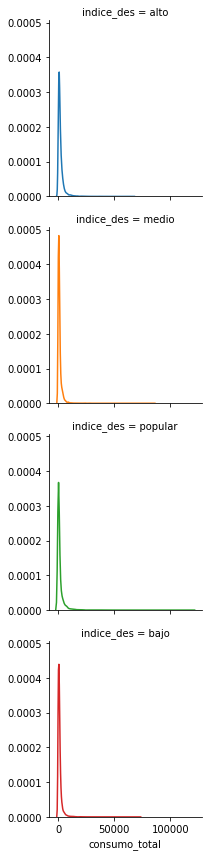

In [157]:
g = sns.FacetGrid(
    dfxx, 
    row="indice_des",
    hue="indice_des"
)

g.map(
    sns.kdeplot,
    "consumo_total"
)